In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Load the FTIR spectra data from the uploaded CSV file
info_A1 = r"C:\Users\pingk\Downloads\fadhli nitip\asik.csv"
ftir_data = pd.read_csv(info_A1)

In [68]:
# Display the first few rows of the dataset to understand its structure
print(ftir_data.head())

  prov_char country_char               wavenumber   649.893   650.376  \
0       BBX           ID  ID-BBX-068-2307-031_001  0.016094  0.016946   
1       BBX           ID  ID-BBX-068-2307-031_002  0.013664  0.013097   
2       BBX           ID  ID-BBX-068-2307-031_003  0.015954  0.016134   
3       BBX           ID  ID-BBX-068-2307-031_004  0.013254  0.012653   
4       BBX           ID  ID-BBX-068-2307-031_005  0.014003  0.013402   

    650.858    651.34   651.822   652.304   652.786  ...  3998.194  3998.676  \
0  0.017469  0.017538  0.017089  0.016154  0.014849  ...  0.000862  0.000858   
1  0.012600  0.012208  0.011938  0.011801  0.011799  ...  0.001151  0.001114   
2  0.015986  0.015469  0.014614  0.013532  0.012372  ...  0.000658  0.000470   
3  0.011752  0.010722  0.009749  0.008982  0.008484  ...  0.002017  0.001975   
4  0.012824  0.012274  0.011728  0.011171  0.010621  ...  0.002369  0.002324   

   3999.158   3999.64  4000.122  tgp_name  dgp_name  fgp_name  country_name  \
0

The dataset contains FTIR spectra data with columns representing different wavenumbers and their corresponding absorption values. The relevant features for the requested visualization include country_name for coloring the spectra. The wavenumber columns range from 649.893 to 4000.122 cm⁻¹.

Let's create a visualization where the x-axis is reversed (4000 to 650 cm⁻¹), and the spectra are colored based on the country_name feature. We will also include a legend indicating the color associated with each country.

To achieve this, we'll plot the spectra using Matplotlib and adjust the x-axis accordingly.

In [69]:
unique_countries = ftir_data['country_name'].unique()
print(unique_countries)


['Indonesia' 'Malaysia' 'Thailand']


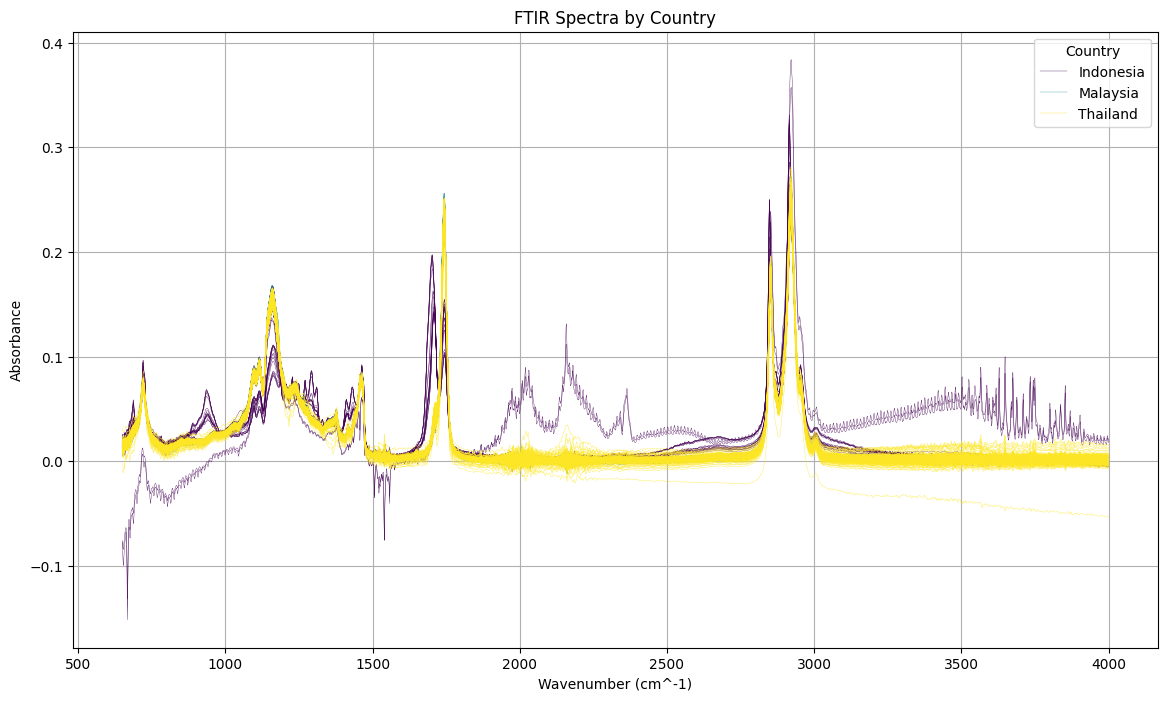

In [70]:
#assert len(unique_countries) == 3, "There should be exactly three unique countries"

# Create a viridis color palette
viridis = plt.get_cmap('viridis', len(unique_countries))
country_colors = {country: viridis(i) for i, country in enumerate(unique_countries)}

# Extract wavenumbers and reverse them
wavenumbers = ftir_data.columns[3:-5].astype(float)[::-1]

# Plotting
plt.figure(figsize=(14, 8))

for country in unique_countries:
    subset = ftir_data[ftir_data['country_name'] == country]
    first_plot = True
    for i, row in subset.iterrows():
        if first_plot:
            plt.plot(wavenumbers, row.iloc[3:-5].values[::-1], label=country, color=country_colors[country], linewidth=0.25)
            first_plot = False
        else:
            plt.plot(wavenumbers, row.iloc[3:-5].values[::-1], color=country_colors[country], linewidth=0.25)

# Customizing the plot
plt.xlabel('Wavenumber (cm^-1)')
plt.ylabel('Absorbance')
plt.title('FTIR Spectra by Country')
plt.legend(title='Country')
plt.grid(True)  # Enable the grid

# Showing the plot
plt.show()

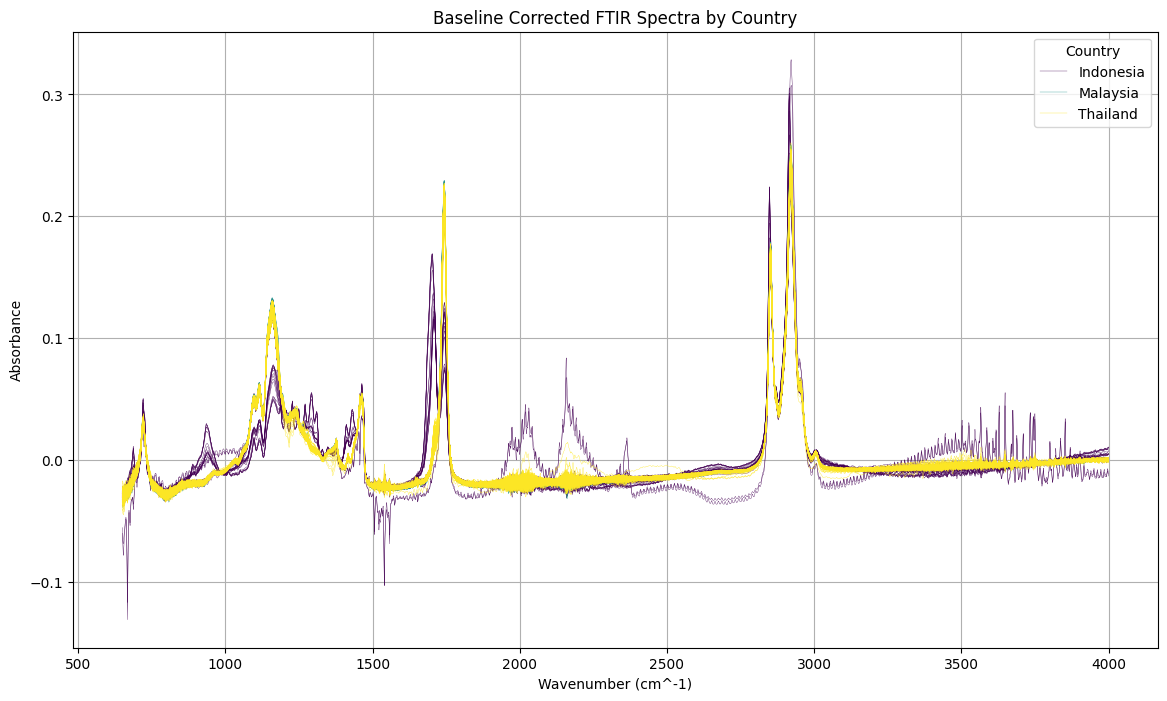

In [71]:

# Check unique countries
unique_countries = ftir_data['country_name'].unique()

# Create a viridis color palette
viridis = plt.get_cmap('viridis', len(unique_countries))
country_colors = {country: viridis(i) for i, country in enumerate(unique_countries)}

# Extract wavenumbers and reverse them
wavenumbers = ftir_data.columns[3:-5].astype(float)[::-1]

# Function to perform baseline correction
def baseline_correction(spectrum, poly_order=3):
    spectrum = spectrum.astype(float)  # Ensure the spectrum is float
    x = np.arange(len(spectrum))
    p = np.polyfit(x, spectrum, poly_order)
    baseline = np.polyval(p, x)
    return spectrum - baseline

# Plotting
plt.figure(figsize=(14, 8))

for country in unique_countries:
    subset = ftir_data[ftir_data['country_name'] == country]
    first_plot = True
    for i, row in subset.iterrows():
        spectrum = row.iloc[3:-5].values[::-1]
        corrected_spectrum = baseline_correction(spectrum)
        if first_plot:
            plt.plot(wavenumbers, corrected_spectrum, label=country, color=country_colors[country], linewidth=0.25)
            first_plot = False
        else:
            plt.plot(wavenumbers, corrected_spectrum, color=country_colors[country], linewidth=0.25)

# Customizing the plot
plt.xlabel('Wavenumber (cm^-1)')
plt.ylabel('Absorbance')
plt.title('Baseline Corrected FTIR Spectra by Country')
plt.legend(title='Country')
plt.grid(True)  # Enable the grid

# Showing the plot
plt.show()

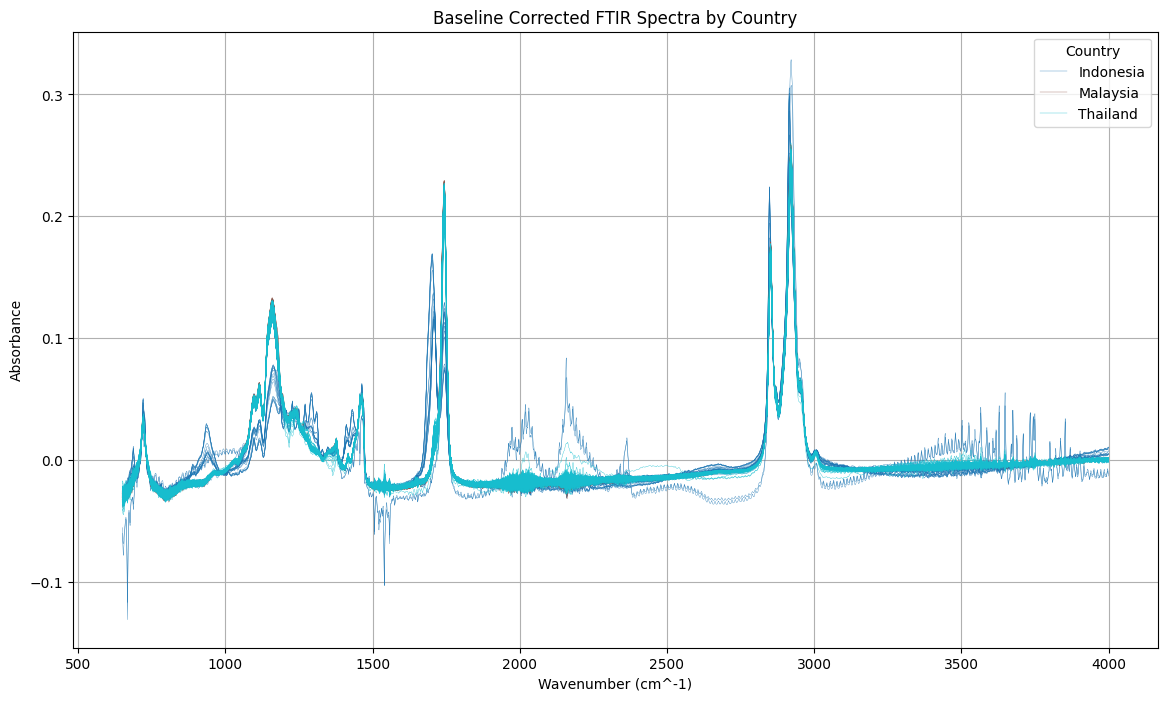

In [75]:
# Check unique countries
unique_countries = ftir_data['country_name'].unique()

# Create a tab10 color palette
tab10 = plt.get_cmap('tab10', len(unique_countries))
country_colors = {country: tab10(i) for i, country in enumerate(unique_countries)}

# Extract wavenumbers and reverse them
wavenumbers = ftir_data.columns[3:-5].astype(float)[::-1]

# Function to perform baseline correction
def baseline_correction(spectrum, poly_order=3):
    spectrum = spectrum.astype(float)  # Ensure the spectrum is float
    x = np.arange(len(spectrum))
    p = np.polyfit(x, spectrum, poly_order)
    baseline = np.polyval(p, x)
    return spectrum - baseline

# Plotting
plt.figure(figsize=(14, 8))

for country in unique_countries:
    subset = ftir_data[ftir_data['country_name'] == country]
    first_plot = True
    for i, row in subset.iterrows():
        spectrum = row.iloc[3:-5].values[::-1]
        corrected_spectrum = baseline_correction(spectrum)
        if first_plot:
            plt.plot(wavenumbers, corrected_spectrum, label=country, color=country_colors[country], linewidth=0.25)
            first_plot = False
        else:
            plt.plot(wavenumbers, corrected_spectrum, color=country_colors[country], linewidth=0.25)

# Customizing the plot
plt.xlabel('Wavenumber (cm^-1)')
plt.ylabel('Absorbance')
plt.title('Baseline Corrected FTIR Spectra by Country')
plt.legend(title='Country')
plt.grid(True)  # Enable the grid

# Showing the plot
plt.show()

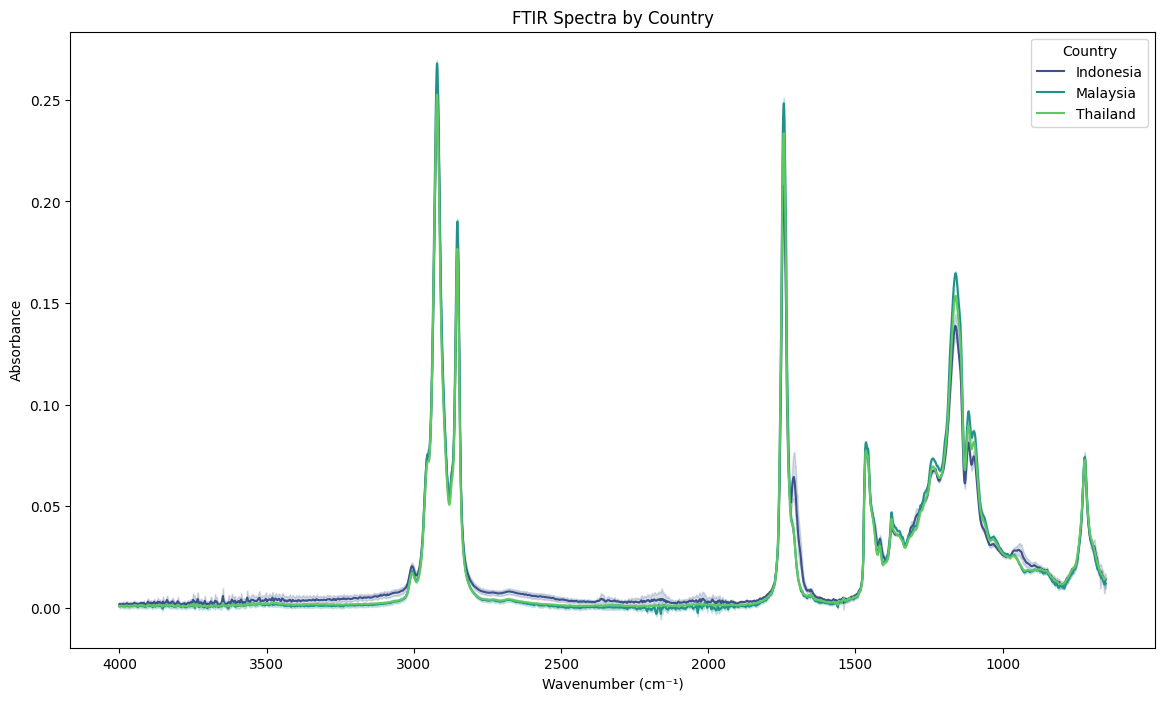

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Data Visualization (Spectroscopy Data by Country Code)
spectroscopy_columns = ftir_data.columns.difference(['country_code', 'prov_char', 'country_char', 'wavenumber', 'tgp_name', 'dgp_name', 'fgp_name', 'thnoth_name'])
melted_ftir_data = ftir_data.melt(id_vars='country_name', value_vars=spectroscopy_columns, var_name='Wavenumber', value_name='Intensity')

# Convert Wavenumber to numeric if it's not already
melted_ftir_data['Wavenumber'] = pd.to_numeric(melted_ftir_data['Wavenumber'])

plt.figure(figsize=(14, 8))
sns.lineplot(data=melted_ftir_data, x='Wavenumber', y='Intensity', hue='country_name', palette='tab10')
plt.title('FTIR Spectra by Country')
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Absorbance')
plt.legend(title='Country')

# Improve x-axis readability by setting ticks every 500 cm⁻¹ and reversing the axis
plt.xticks(np.arange(4000, 649, -500))  # Ticks from 4000 to 650 cm⁻¹
plt.gca().invert_xaxis()  # Reverse the x-axis
plt.grid(False)  # Enable grid

plt.show()

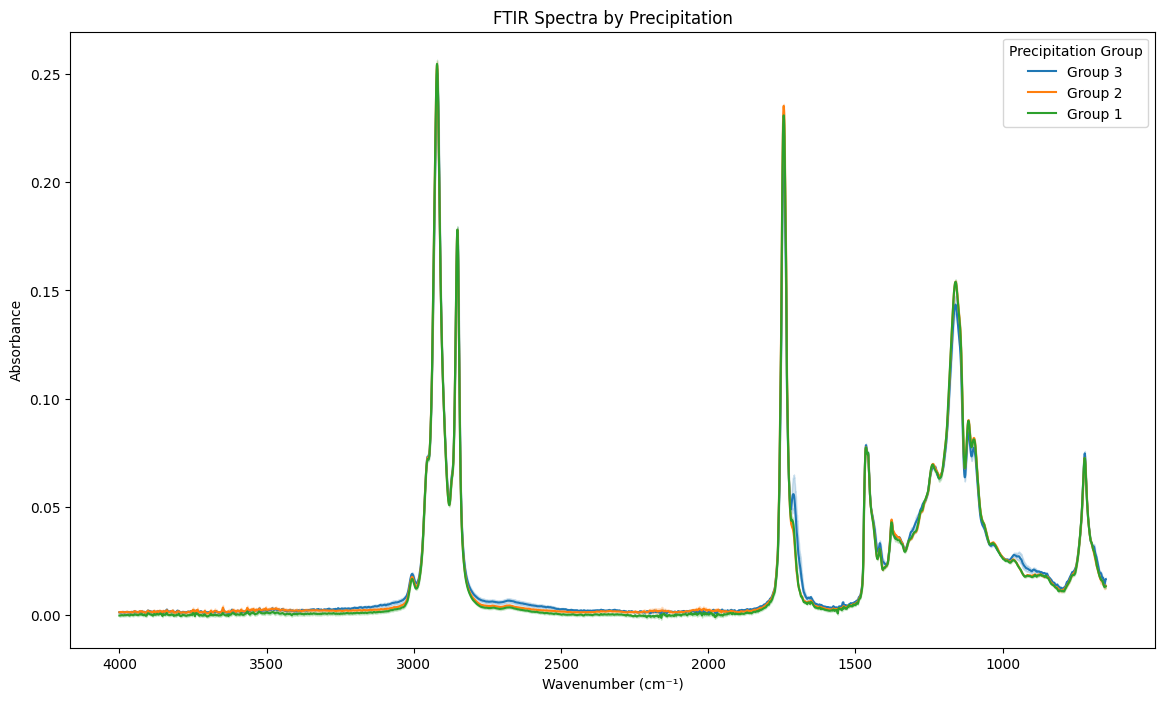

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Data Visualization (Spectroscopy Data by Country Code)
spectroscopy_columns = ftir_data.columns.difference(['country_code', 'prov_char', 'country_char', 'wavenumber', 'country_name', 'dgp_name', 'fgp_name', 'thnoth_name'])
melted_ftir_data = ftir_data.melt(id_vars='tgp_name', value_vars=spectroscopy_columns, var_name='Wavenumber', value_name='Intensity')

# Convert Wavenumber to numeric if it's not already
melted_ftir_data['Wavenumber'] = pd.to_numeric(melted_ftir_data['Wavenumber'])

plt.figure(figsize=(14, 8))
sns.lineplot(data=melted_ftir_data, x='Wavenumber', y='Intensity', hue='tgp_name', palette='tab10')
plt.title('FTIR Spectra by Precipitation')
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Absorbance')
plt.legend(title='Precipitation Group')

# Improve x-axis readability by setting ticks every 500 cm⁻¹ and reversing the axis
plt.xticks(np.arange(4000, 649, -500))  # Ticks from 4000 to 650 cm⁻¹
plt.gca().invert_xaxis()  # Reverse the x-axis
plt.grid(False)  # Enable grid

plt.show()

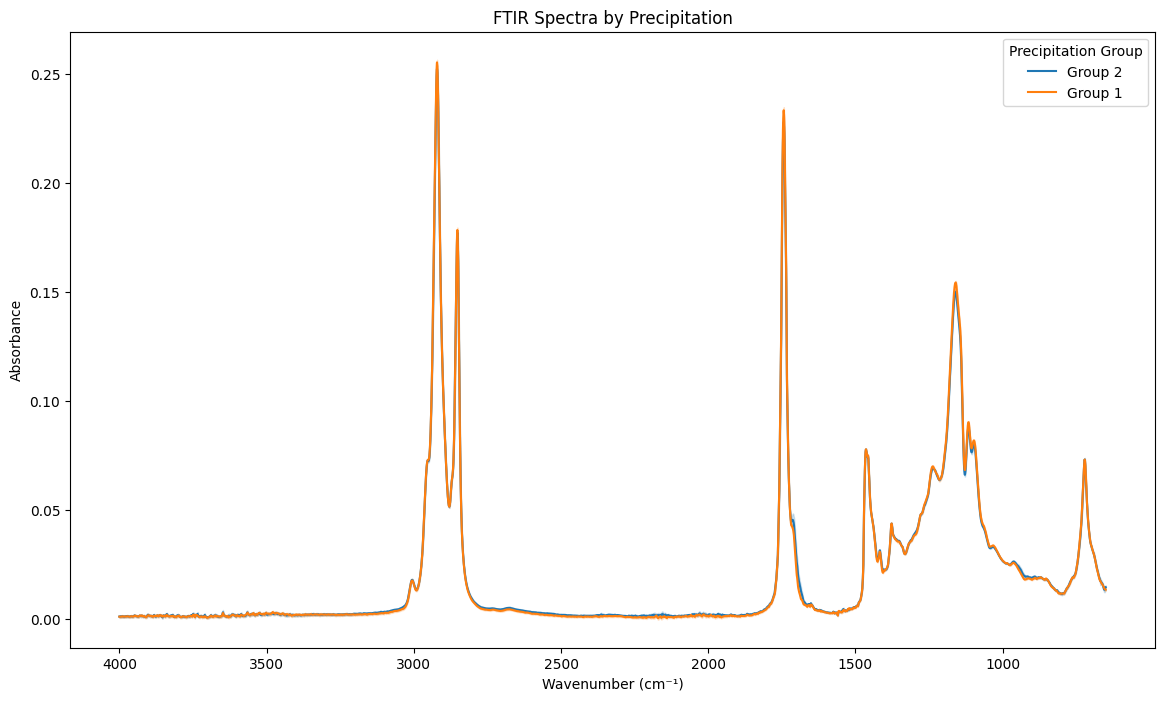

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Data Visualization (Spectroscopy Data by Country Code)
spectroscopy_columns = ftir_data.columns.difference(['country_code', 'prov_char', 'country_char', 'wavenumber', 'country_name', 'tgp_name', 'fgp_name', 'thnoth_name'])
melted_ftir_data = ftir_data.melt(id_vars='dgp_name', value_vars=spectroscopy_columns, var_name='Wavenumber', value_name='Intensity')

# Convert Wavenumber to numeric if it's not already
melted_ftir_data['Wavenumber'] = pd.to_numeric(melted_ftir_data['Wavenumber'])

plt.figure(figsize=(14, 8))
sns.lineplot(data=melted_ftir_data, x='Wavenumber', y='Intensity', hue='dgp_name', palette='tab10')
plt.title('FTIR Spectra by Precipitation')
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Absorbance')
plt.legend(title='Precipitation Group')

# Improve x-axis readability by setting ticks every 500 cm⁻¹ and reversing the axis
plt.xticks(np.arange(4000, 649, -500))  # Ticks from 4000 to 650 cm⁻¹
plt.gca().invert_xaxis()  # Reverse the x-axis
plt.grid(False)  # Enable grid

plt.show()

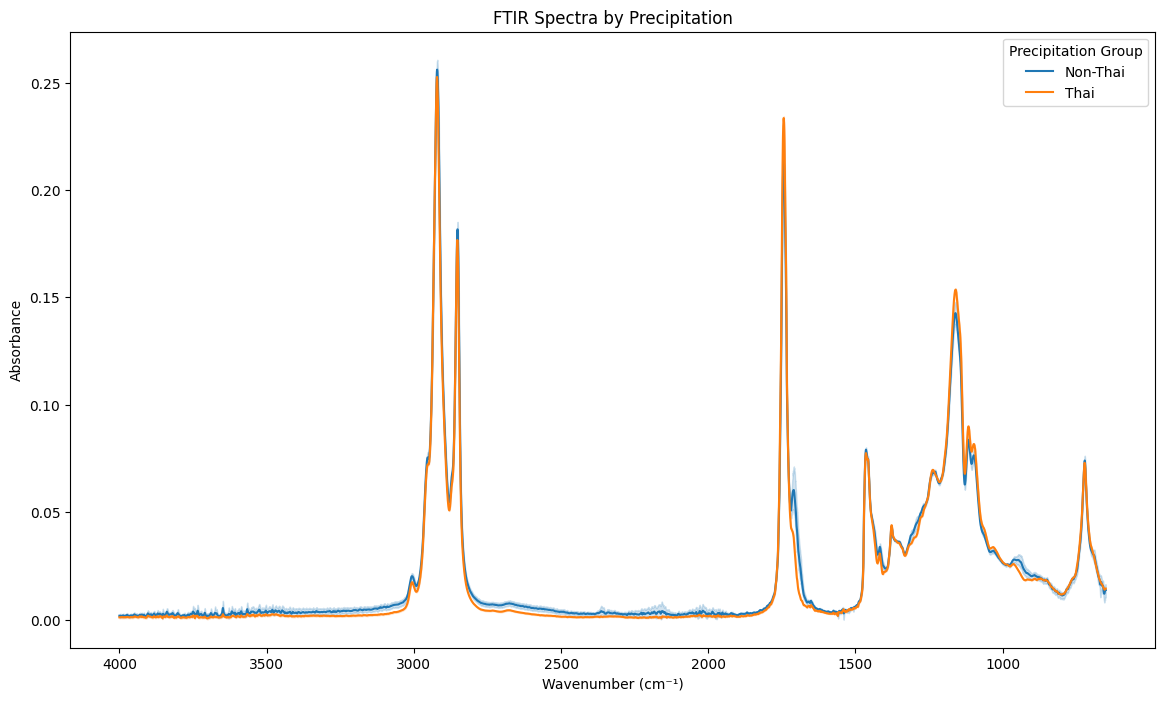

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Data Visualization (Spectroscopy Data by Country Code)
spectroscopy_columns = ftir_data.columns.difference(['country_code', 'prov_char', 'country_char', 'wavenumber', 'country_name', 'tgp_name', 'fgp_name', 'dgp_name'])
melted_ftir_data = ftir_data.melt(id_vars='thnoth_name', value_vars=spectroscopy_columns, var_name='Wavenumber', value_name='Intensity')

# Convert Wavenumber to numeric if it's not already
melted_ftir_data['Wavenumber'] = pd.to_numeric(melted_ftir_data['Wavenumber'])

plt.figure(figsize=(14, 8))
sns.lineplot(data=melted_ftir_data, x='Wavenumber', y='Intensity', hue='thnoth_name', palette='tab10')
plt.title('FTIR Spectra by Precipitation')
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Absorbance')
plt.legend(title='Precipitation Group')

# Improve x-axis readability by setting ticks every 500 cm⁻¹ and reversing the axis
plt.xticks(np.arange(4000, 649, -500))  # Ticks from 4000 to 650 cm⁻¹
plt.gca().invert_xaxis()  # Reverse the x-axis
plt.grid(False)  # Enable grid

plt.show()